### Grad-CAM for image classification (PyTorch)

This is an example of Grad-CAM on image classification with a PyTorch model. If using this explainer, please cite "Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization, Selvaraju et al., https://arxiv.org/abs/1610.02391".

In [189]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [190]:
import json
import torch
from torchvision import models, transforms
from PIL import Image as PilImage
import numpy as np
from omnixai.data.image import Image
from omnixai.explainers.vision.specific.gradcam.pytorch.gradcam import GradCAM
import matplotlib.pyplot as plt

We recommend using `Image` to represent a batch of images. `Image` can be constructed from a numpy array or a Pillow image. The following code loads one test image and the class names on ImageNet.

In [191]:
# Load the test image
img = Image(PilImage.open('images/airplane.jpg').convert('RGB'))
# Load the class names
with open('images/imagenet_class_index.json', 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [192]:
img.shape

(1, 1250, 1000, 3)

The model considered here is a ResNet model pretrained on ImageNet. The preprocessing function takes an `Image` instance as its input and outputs the processed features that the ML model consumes. In this example, the `Image` object is converted into a torch tensor via the defined `transform`.

In [193]:
# A ResNet Model
model = models.resnet50(pretrained=True)
# The preprocessing model
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

To initialize `GradCAM`, we need to set the following parameters:

  - `model`: The ML model to explain, e.g., `tf.keras.Model` or `torch.nn.Module`.
  - `preprocess`: The preprocessing function converting the raw data (a `Image` instance) into the inputs of `model`.
  - `target_layer`: The target convolutional layer for explanation, which can be `tf.keras.layers.Layer` or `torch.nn.Module`.
  - `mode`: The task type, e.g., "classification" or "regression".

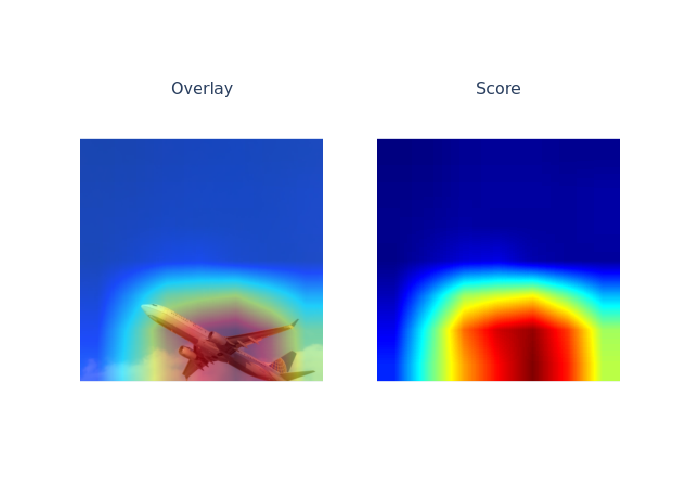

In [194]:
explainer = GradCAM(
    model=model,
    target_layer=model.layer4[-1],
    preprocess_function=preprocess
)
# Explain the top label
explanations = explainer.explain(img)
explanations.ipython_plot(index=0, class_names=idx2label)

In [195]:
img.shape

(1, 1250, 1000, 3)

In [196]:
explanations

[{'image': array([[[ 53, 138, 222],
        [ 53, 138, 222],
        [ 53, 138, 222],
        ...,
        [ 56, 146, 232],
        [ 56, 146, 232],
        [ 56, 146, 232]],

       [[ 53, 138, 222],
        [ 53, 138, 222],
        [ 53, 138, 222],
        ...,
        [ 56, 146, 232],
        [ 56, 146, 232],
        [ 57, 147, 233]],

       [[ 53, 138, 222],
        [ 53, 138, 222],
        [ 53, 138, 222],
        ...,
        [ 56, 146, 232],
        [ 56, 146, 232],
        [ 57, 147, 233]],

       ...,

       [[133, 178, 241],
        [138, 181, 242],
        [143, 183, 242],
        ...,
        [166, 193, 241],
        [168, 193, 241],
        [168, 193, 241]],

       [[139, 181, 241],
        [143, 183, 241],
        [145, 184, 241],
        ...,
        [169, 194, 241],
        [169, 194, 240],
        [169, 193, 241]],

       [[141, 183, 243],
        [144, 184, 243],
        [146, 185, 243],
        ...,
        [171, 197, 242],
        [171, 195, 241],
        [169,

In [197]:
result= explanations.get_explanations()

In [198]:
print(idx2label[result[0]['target_label']])

airliner


In [199]:
print(result[0]['scores'].shape)

(224, 224)


In [200]:
print(result[0]['image'].shape)

(224, 224, 3)


In [201]:
print(result[0]['scores'])

[[0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 [0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 [0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 ...
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]]


In [202]:
score = result[0]['scores']

In [203]:
s = np.asarray(score)

In [204]:
s.tofile('foo.csv',sep=',',format='%10.5f')

In [205]:
scoremap = PilImage.fromarray(s, mode="RGB")

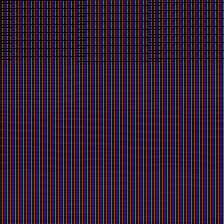

In [206]:
scoremap

In [207]:
# def sequences(m):
#     import numpy as np
#     res = []
#     for i in range(len(m)):
#         temp = []
#         if i % 32 == 0:
#             for j in range(len(m[0])):
#                 if j % 32 == 0:
#                     temp.append(m[i][j])
#             res.append(temp)
#     return np.array(res)

In [208]:
print(s)

[[0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 [0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 [0.         0.         0.         ... 0.01568627 0.01568627 0.01568627]
 ...
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]
 [0.16078431 0.16078431 0.16078431 ... 0.55686275 0.55686275 0.55686275]]


In [209]:
# s7 = np.array([[s[0,0],s[0,32],s[0,64],s[0,96],s[0,128],s[0,160],s[0,192]],
#               [s[32,0],s[32,32],s[32,64],s[32,96],s[32,128],s[32,160],s[32,192]],
#                 [s[64,0],s[64,32],s[64,64],s[64,96],s[64,128],s[64,160],s[64,192]],
#                  [s[0,0],s[0,32],s[0,64],s[0,96],s[0,128],s[0,160],s[0,192]],
#                 [s[0,0],s[0,32],s[0,64],s[0,96],s[0,128],s[0,160],s[0,192]],
#                 [s[0,0],s[0,32],s[0,64],s[0,96],s[0,128],s[0,160],s[0,192]],
#                     [s[0,0],s[0,32],s[0,64],s[0,96],s[0,128],s[0,160],s[193,193]],
#               ])

In [210]:
#print(s7)

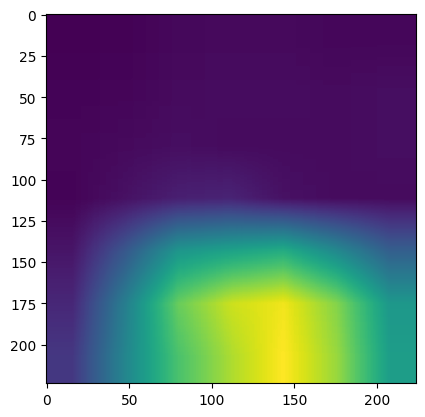

In [211]:
plt.imshow(s)